<a href="https://colab.research.google.com/github/askolesov0608/SJK006-Project/blob/main/SJK006_Clusters_Think_About.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


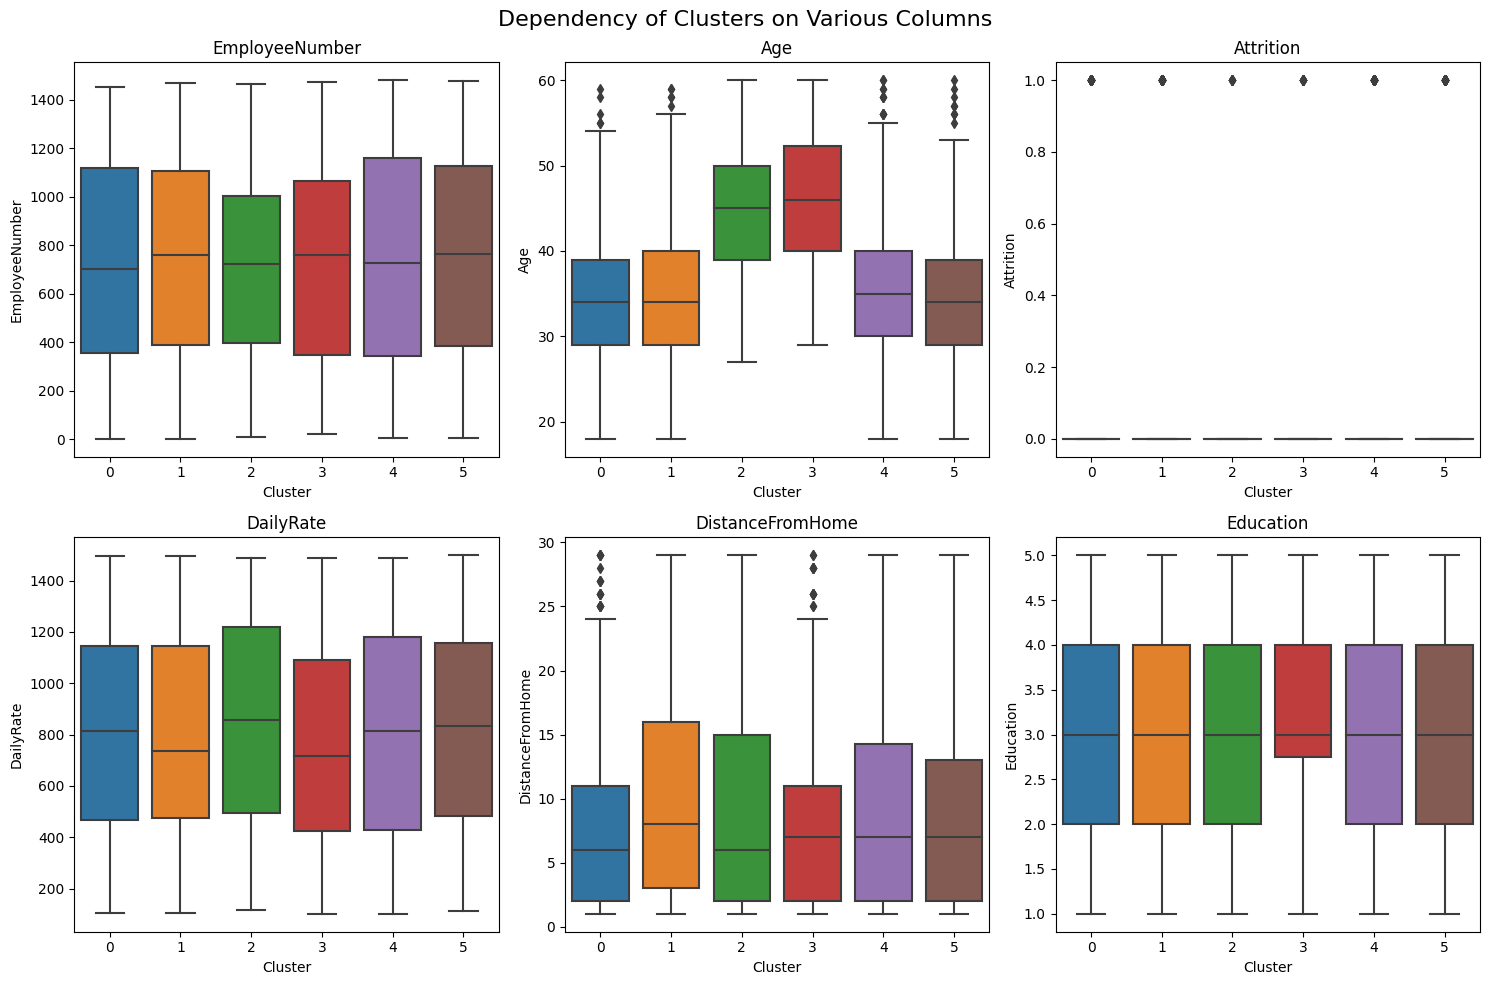

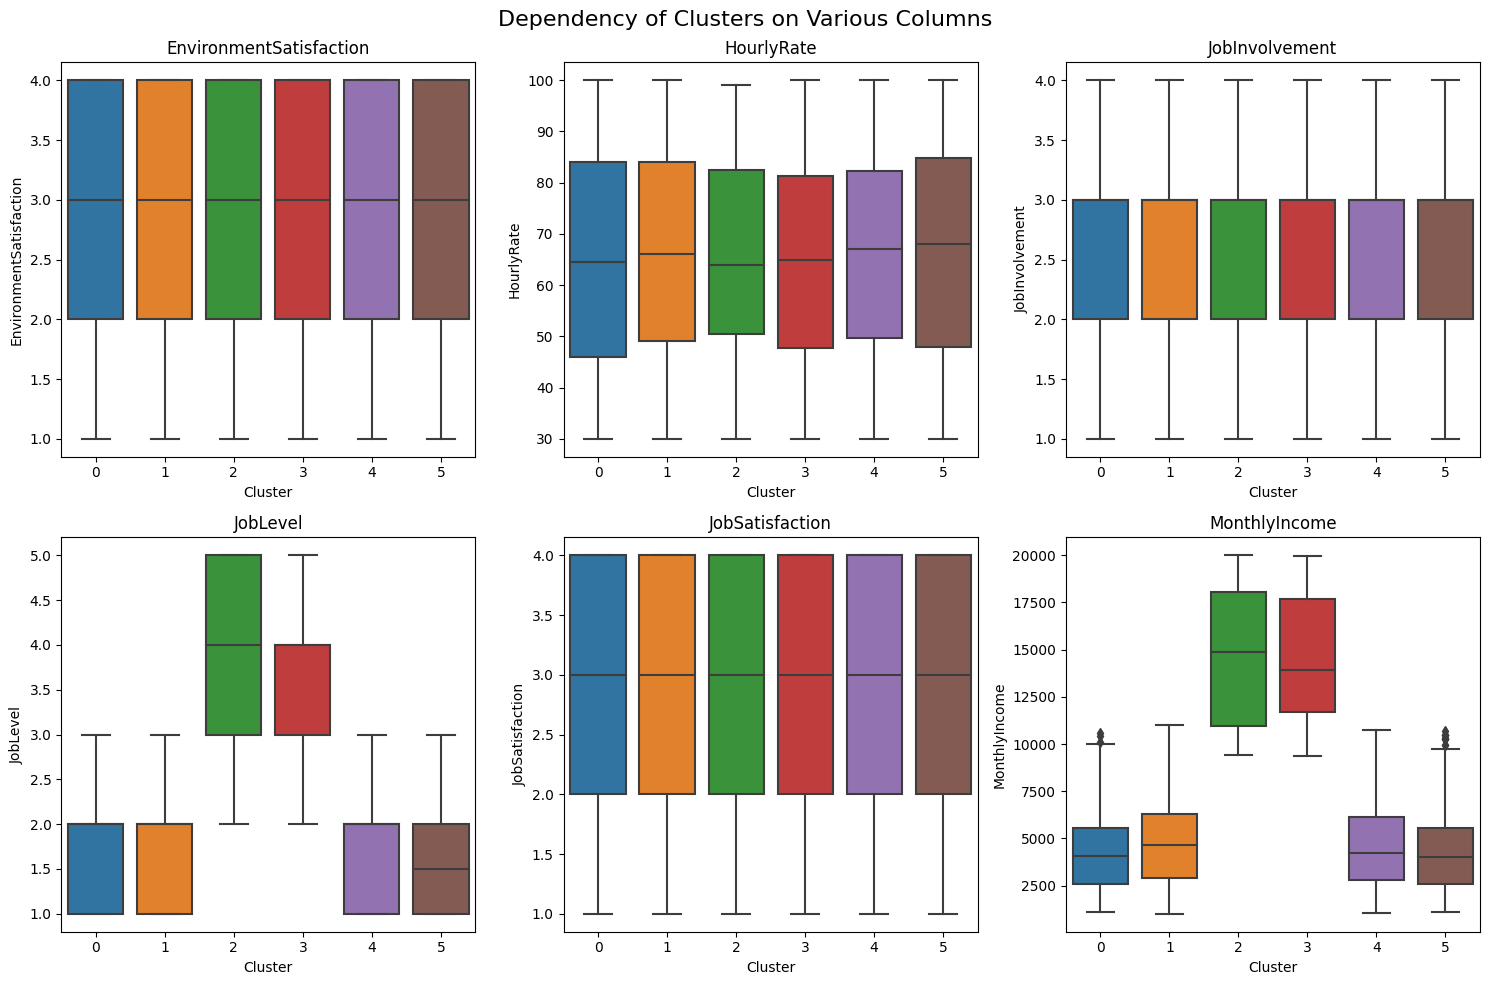

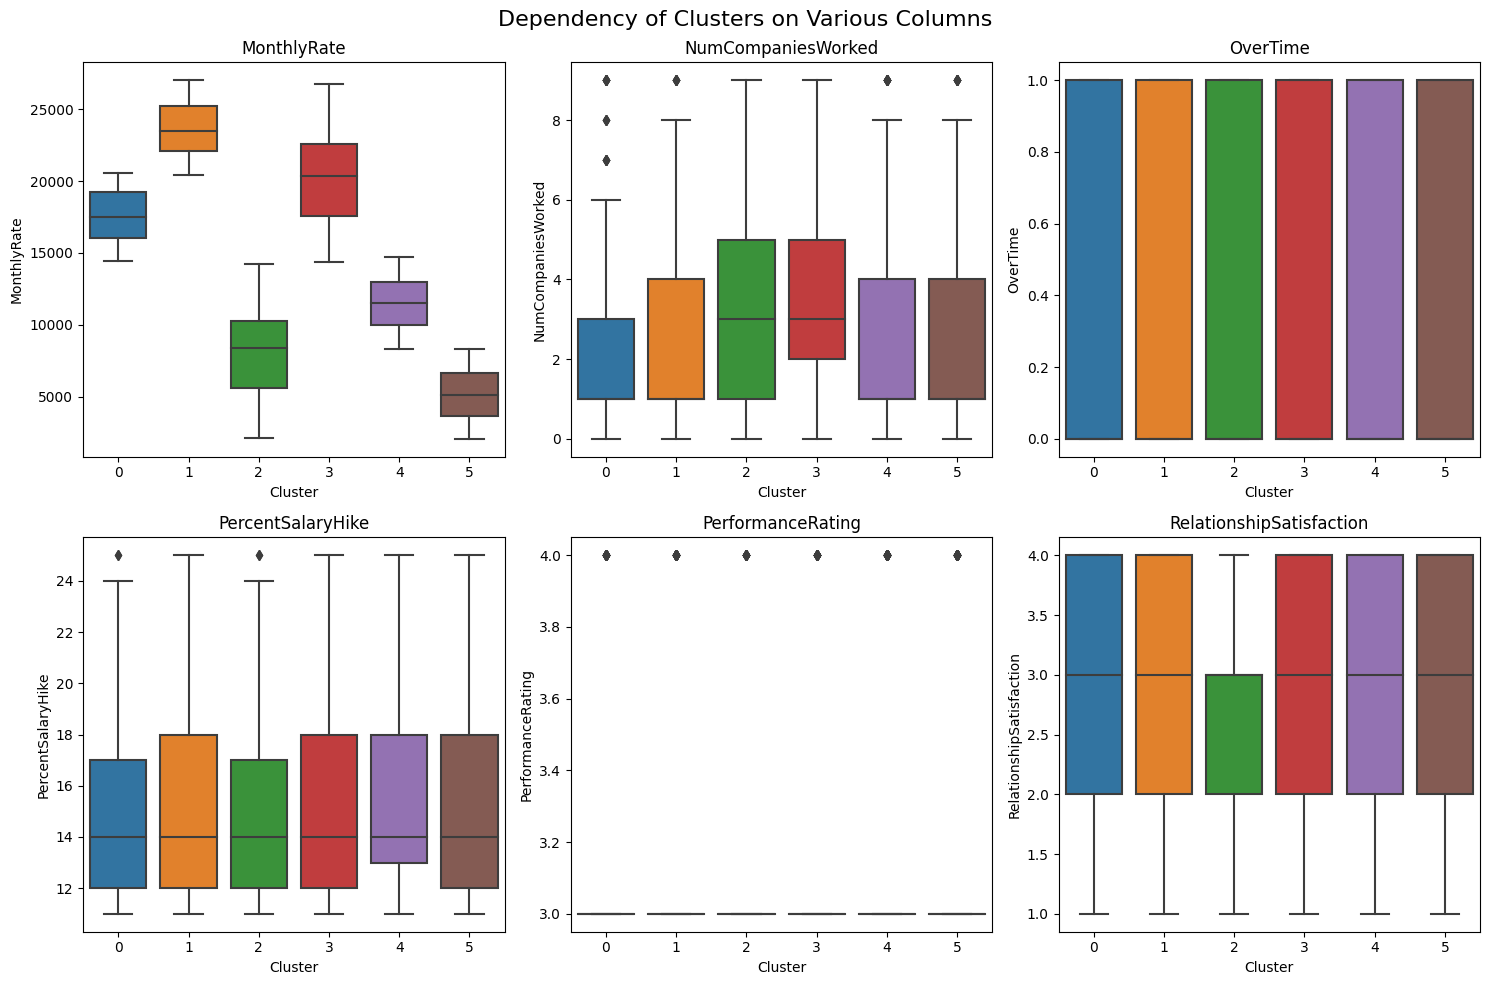

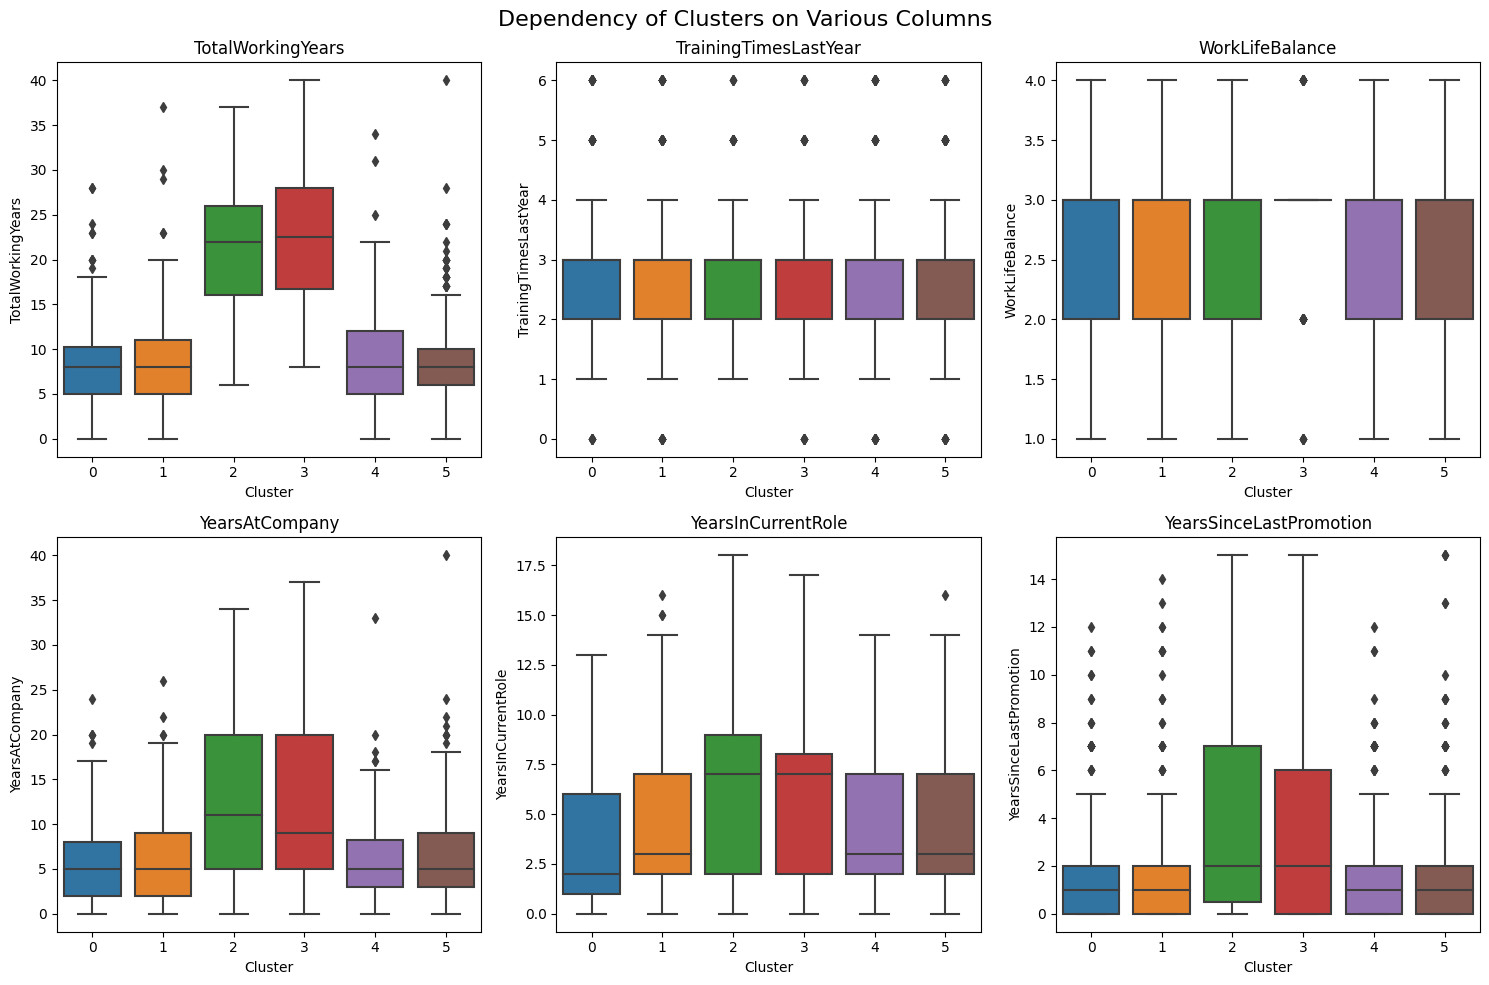

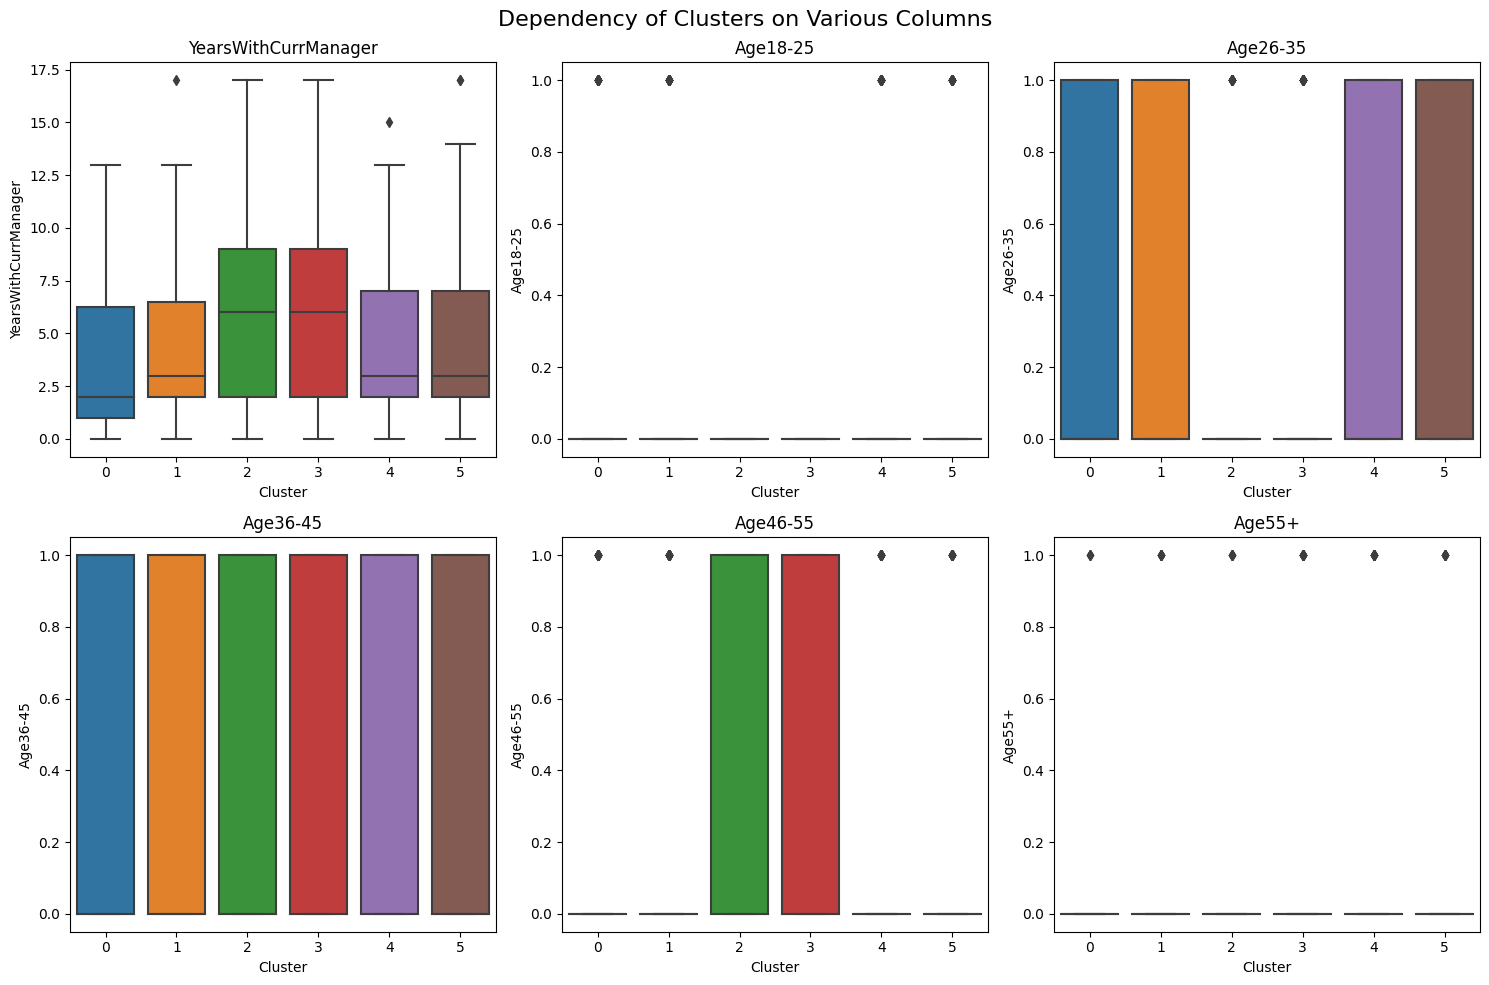

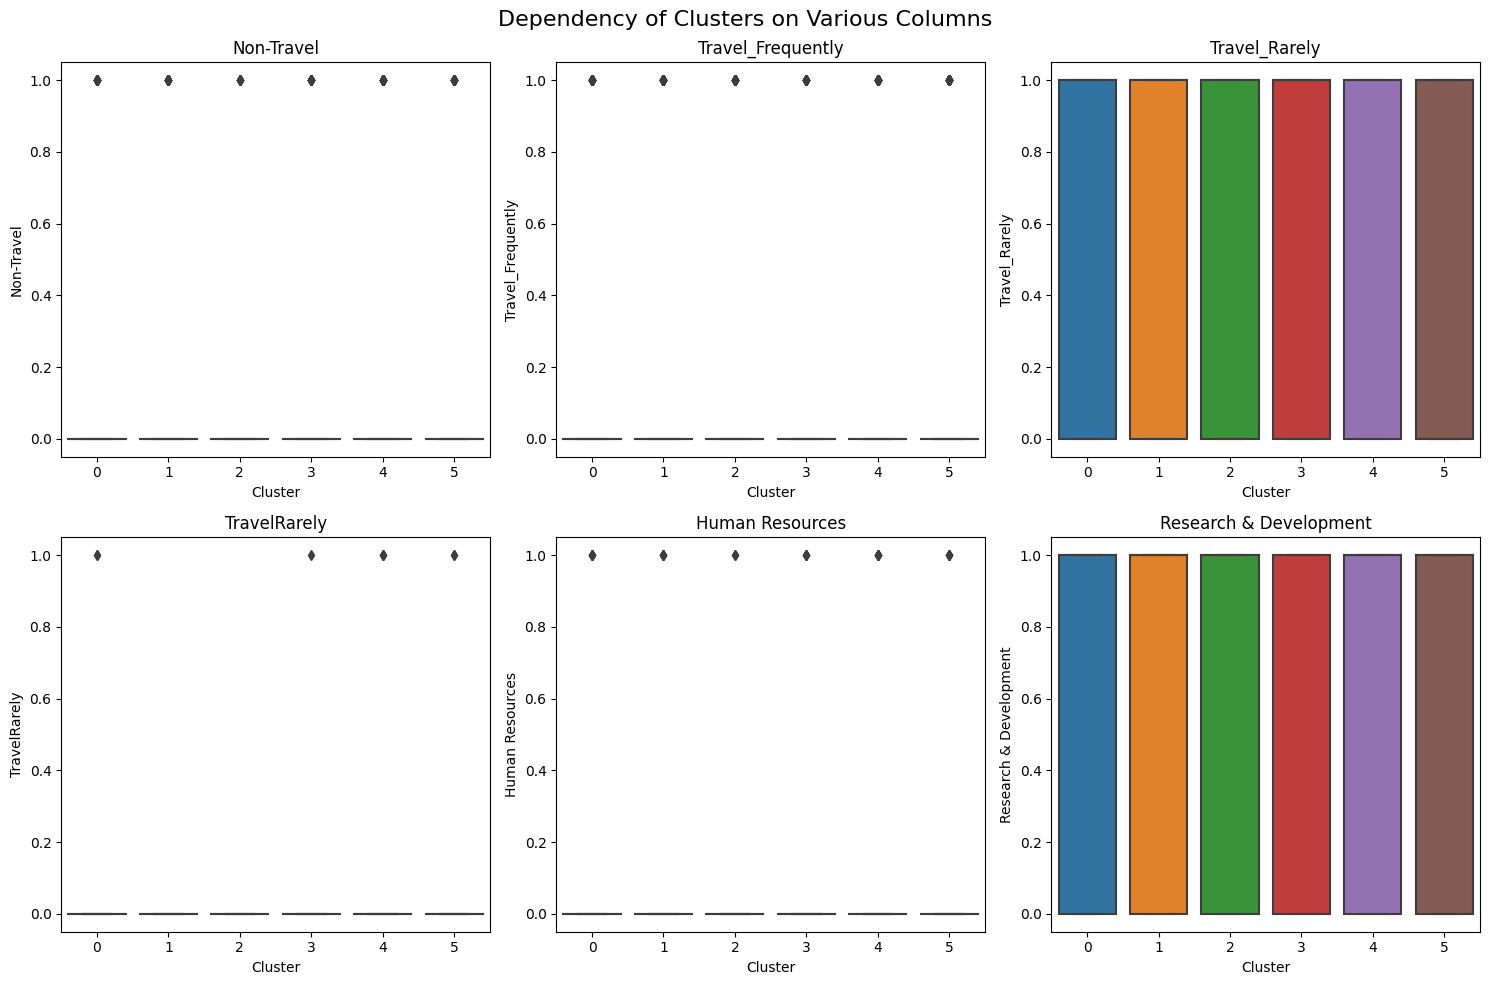

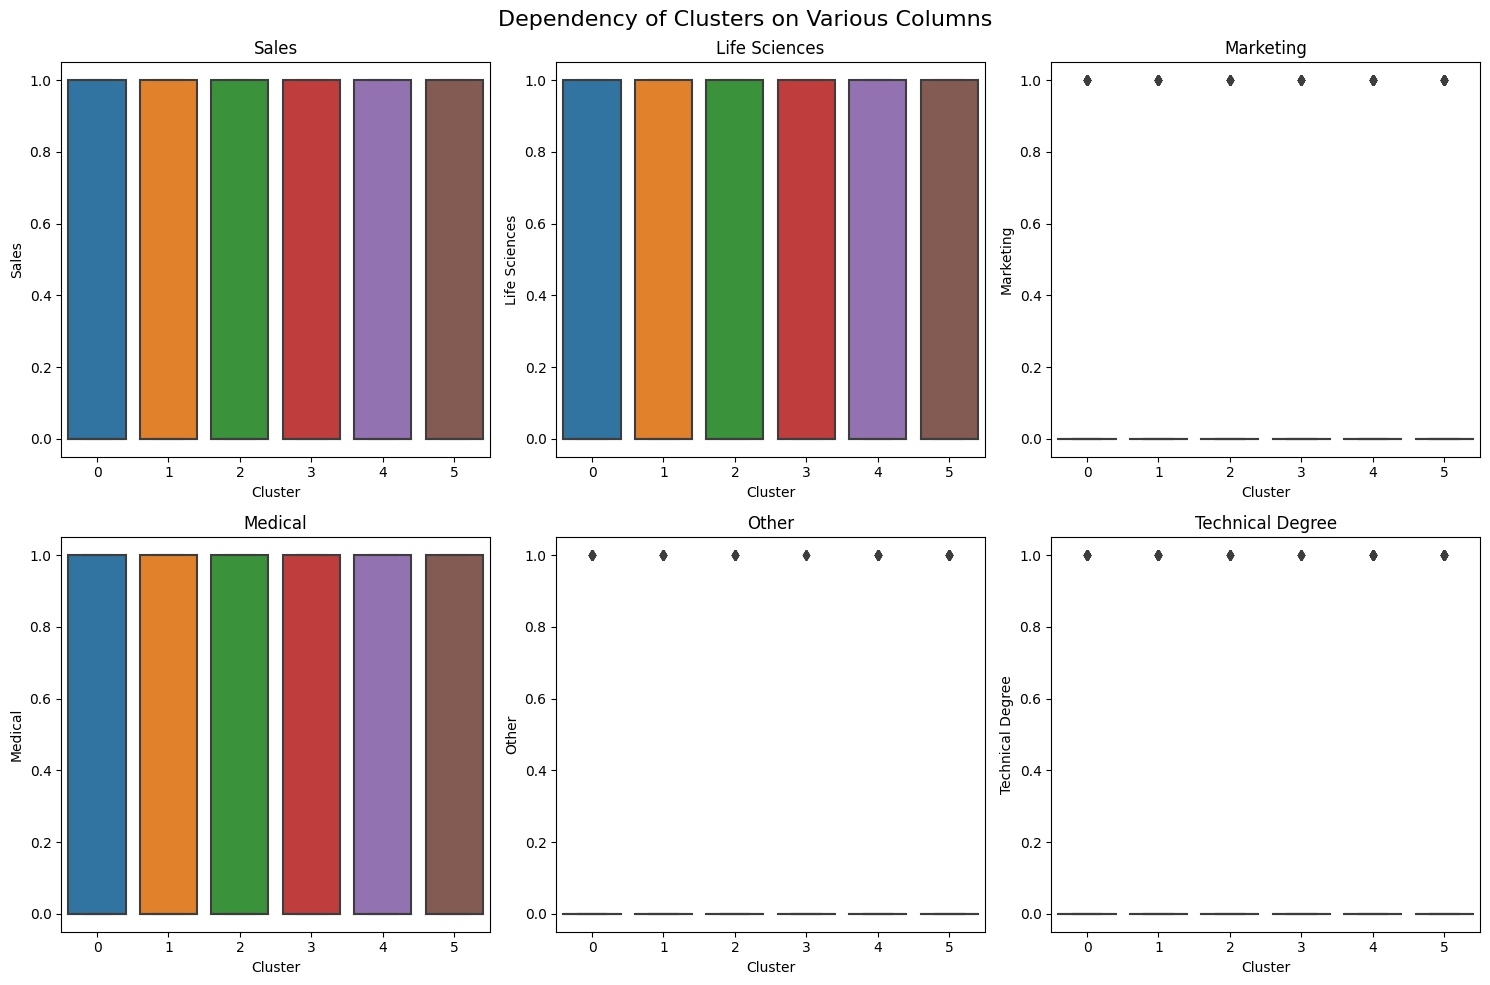

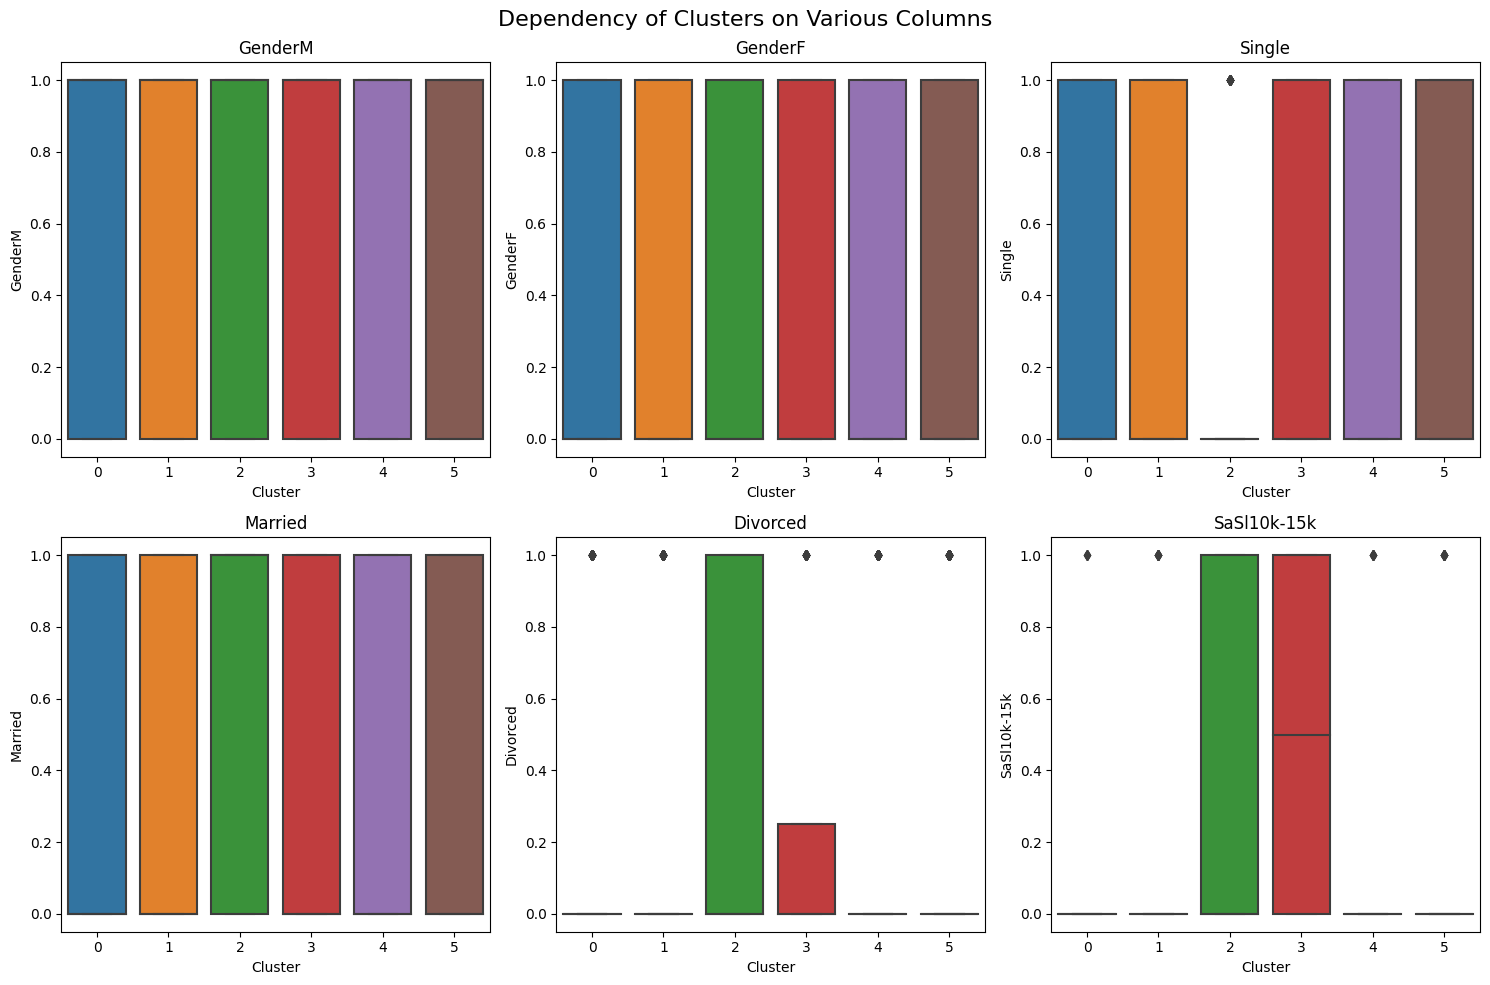

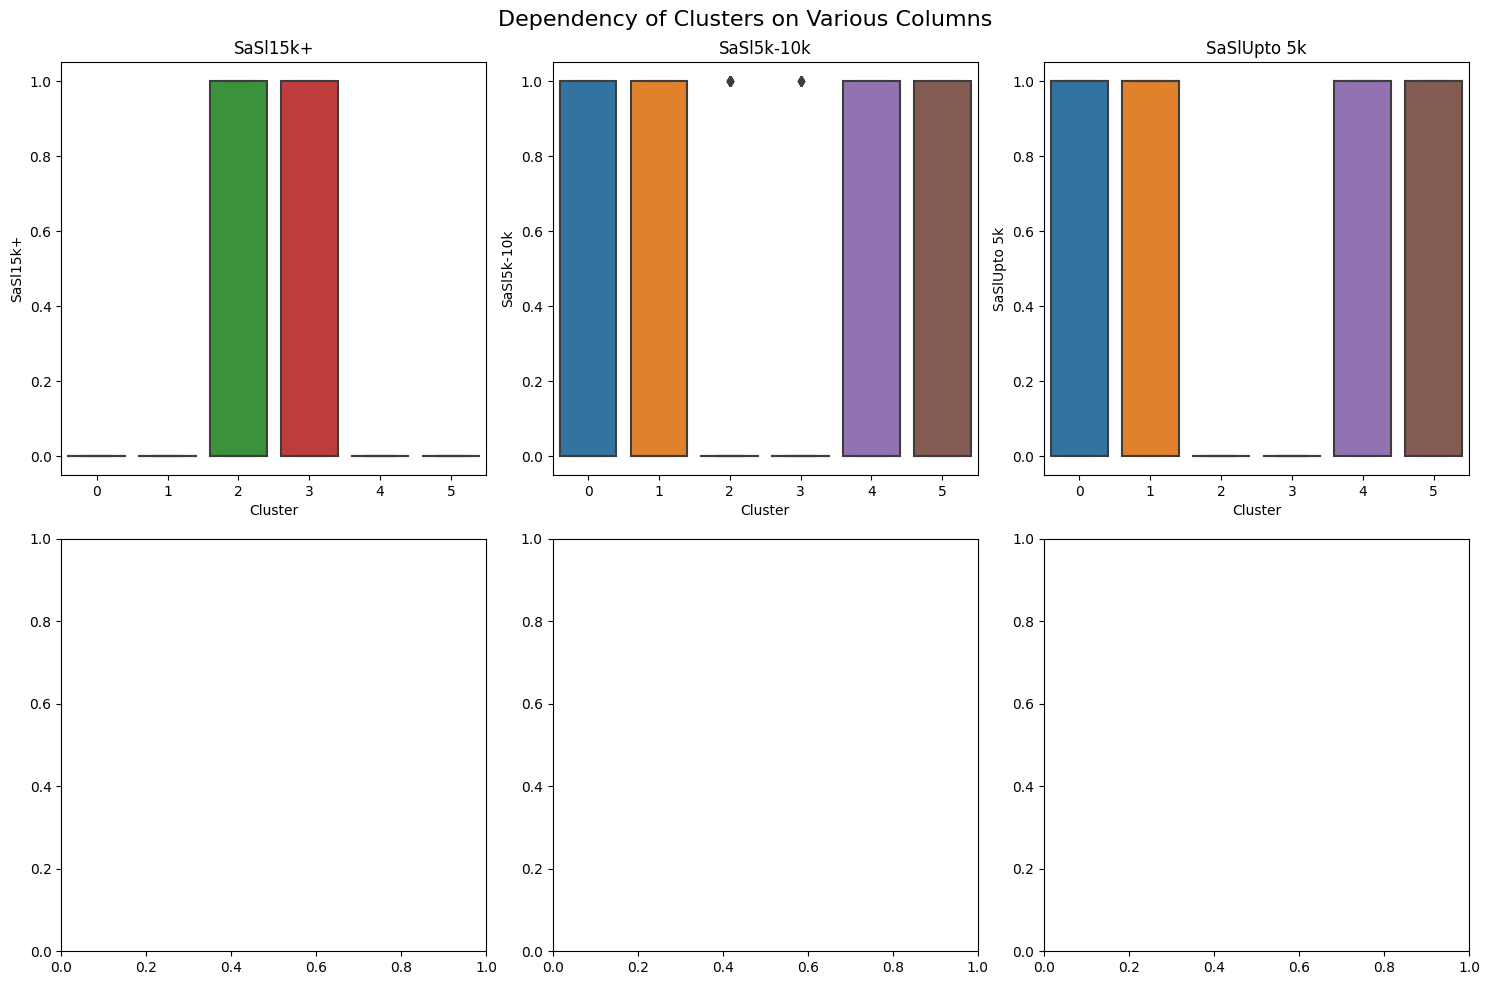

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

# Загрузка данных (замените 'your_data_file.xlsx' на путь к вашему файлу)
data = pd.read_excel('TestDataCV_DigitalV2.xlsx')

# Выберите числовые столбцы для кластеризации
numeric_columns = data.select_dtypes(include=['number']).columns
data_for_clustering = data[numeric_columns]

# Заполнение отсутствующих значений
data_for_clustering = data_for_clustering.fillna(data_for_clustering.mean())

# Кластеризация KMeans
kmeans = KMeans(n_clusters=6, random_state=0)
data_for_clustering['Cluster'] = kmeans.fit_predict(data_for_clustering)

# Функция для создания субплотов для диапазона столбцов
def create_subplots_for_column_range(start, end):
    subset_columns = data_for_clustering.columns.drop('Cluster')[start:end]
    n_plots = len(subset_columns)
    n_rows = 2
    n_cols = 3
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
    fig.suptitle('Dependency of Clusters on Various Columns', fontsize=16)

    for i, column in enumerate(subset_columns):
        sns.boxplot(ax=axes[i // n_cols, i % n_cols], x='Cluster', y=column, data=data_for_clustering)
        axes[i // n_cols, i % n_cols].set_title(column)

    plt.tight_layout()
    plt.show()

# Создание субплотов
for i in range(0, len(data_for_clustering.columns) - 1, 6):
    create_subplots_for_column_range(i, i + 6)
